<a href="https://colab.research.google.com/github/atherfawaz/WGANGP-Faces/blob/master/WGANGP_Faces.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/davidADSP/GDL_code.git

Cloning into 'GDL_code'...
remote: Enumerating objects: 391, done.
remote: Total 391 (delta 0), reused 0 (delta 0), pack-reused 391
Receiving objects: 100% (391/391), 22.13 MiB | 36.38 MiB/s, done.
Resolving deltas: 100% (237/237), done.


In [1]:
%cd GDL_code
#!pip install -r requirements.txt

/content/GDL_code


In [2]:
%matplotlib inline

import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle

Using TensorFlow backend.


In [ ]:
!mkdir /content/GDL_code/data/celeb
!mv /content/GDL_code/data/celeb.zip /content/GDL_code/data/celeb/celeb.zip 

In [3]:
!mkdir data_faces
%cd data_faces
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

/content/GDL_code/data_faces
--2020-09-17 11:30:36--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.8
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.8|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  63.9MB/s    in 21s     

2020-09-17 11:30:58 (64.4 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



In [10]:
#!unzip celeba.zip
%cd ..

/content/GDL_code


In [11]:
import os 

# run params
SECTION = 'gan'
RUN_ID = '0003'
DATA_NAME = 'celeb'
RUN_FOLDER = 'run/{}/'.format(SECTION)
RUN_FOLDER += '_'.join([RUN_ID, DATA_NAME])

if not os.path.exists(RUN_FOLDER):
    os.mkdir(RUN_FOLDER)
    os.mkdir(os.path.join(RUN_FOLDER, 'viz'))
    os.mkdir(os.path.join(RUN_FOLDER, 'images'))
    os.mkdir(os.path.join(RUN_FOLDER, 'weights'))

mode =  'build' #'load' #

In [12]:
BATCH_SIZE = 64
IMAGE_SIZE = 64

In [23]:
#!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
#!unzip celeba.zip
%cd ..

/content/GDL_code


In [24]:
import os
import matplotlib.pyplot as plt

from models.WGANGP import WGANGP
from utils.loaders import load_celeb

import pickle

#!mkdir /content/GDL_code/data/celeb 
#!mv /content/GDL_code/celeb /data
x_train = load_celeb(DATA_NAME, IMAGE_SIZE, BATCH_SIZE)

Found 202599 images belonging to 1 classes.


In [25]:
x_train[0][0][0]

array([[[ 0.88235295,  0.6156863 ,  0.40392157],
        [ 0.88235295,  0.6156863 ,  0.40392157],
        [ 0.88235295,  0.6156863 ,  0.40392157],
        ...,
        [ 0.40392157,  0.05098039, -0.25490198],
        [ 0.5764706 ,  0.09803922, -0.33333334],
        [ 0.5529412 ,  0.09019608, -0.34901962]],

       [[ 0.88235295,  0.6156863 ,  0.40392157],
        [ 0.88235295,  0.6156863 ,  0.40392157],
        [ 0.88235295,  0.6156863 ,  0.40392157],
        ...,
        [ 0.40392157,  0.05098039, -0.25490198],
        [ 0.5764706 ,  0.09803922, -0.33333334],
        [ 0.5529412 ,  0.09019608, -0.34901962]],

       [[ 0.88235295,  0.6156863 ,  0.40392157],
        [ 0.88235295,  0.6156863 ,  0.40392157],
        [ 0.88235295,  0.6156863 ,  0.40392157],
        ...,
        [ 0.3882353 ,  0.03529412, -0.27058825],
        [ 0.5764706 ,  0.09803922, -0.33333334],
        [ 0.5529412 ,  0.09019608, -0.34901962]],

       ...,

       [[ 0.31764707,  0.12156863, -0.05098039],
        [ 0

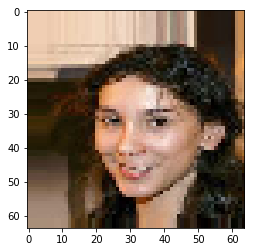

In [27]:
plt.imshow((x_train[0][0][0]+1)/2)

In [31]:
import tensorflow as tf
with tf.device('/gpu:0'):
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
    b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
    c = tf.matmul(a, b)

with tf.Session() as sess:
    print (sess.run(c))

InvalidArgumentError: ignored

In [32]:
gan = WGANGP(input_dim = (IMAGE_SIZE,IMAGE_SIZE,3)
        , critic_conv_filters = [64,128,256,512]
        , critic_conv_kernel_size = [5,5,5,5]
        , critic_conv_strides = [2,2,2,2]
        , critic_batch_norm_momentum = None
        , critic_activation = 'leaky_relu'
        , critic_dropout_rate = None
        , critic_learning_rate = 0.0002
        , generator_initial_dense_layer_size = (4, 4, 512)
        , generator_upsample = [1,1,1,1]
        , generator_conv_filters = [256,128,64,3]
        , generator_conv_kernel_size = [5,5,5,5]
        , generator_conv_strides = [2,2,2,2]
        , generator_batch_norm_momentum = 0.9
        , generator_activation = 'leaky_relu'
        , generator_dropout_rate = None
        , generator_learning_rate = 0.0002
        , optimiser = 'adam'
        , grad_weight = 10
        , z_dim = 100
        , batch_size = BATCH_SIZE
        )

if mode == 'build':
    gan.save(RUN_FOLDER)

else:
    gan.load_weights(os.path.join(RUN_FOLDER, 'weights/weights.h5'))

W0917 11:44:41.191532 139784917628800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0917 11:44:41.204700 139784917628800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4115: The name tf.random_normal is deprecated. Please use tf.random.normal instead.

W0917 11:44:41.234109 139784917628800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0917 11:44:41.897072 139784917628800 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1834: The name tf.nn.fused_batch_norm is deprecated. Please use tf.compat.v1.nn.fused_batch_norm instead.

W0917 11:44:42.530229 13978491762

In [33]:
gan.critic.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
critic_input (InputLayer)    (None, 64, 64, 3)         0         
_________________________________________________________________
critic_conv_0 (Conv2D)       (None, 32, 32, 64)        4864      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
critic_conv_1 (Conv2D)       (None, 16, 16, 128)       204928    
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
critic_conv_2 (Conv2D)       (None, 8, 8, 256)         819456    
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 8, 8, 256)         0         
__________

In [34]:
gan.generator.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
generator_input (InputLayer) (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 8192)              827392    
_________________________________________________________________
batch_normalization_1 (Batch (None, 8192)              32768     
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 8192)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 512)         0         
_________________________________________________________________
generator_conv_0 (Conv2DTran (None, 8, 8, 256)         3277056   
_________________________________________________________________
batch_normalization_2 (Batch (None, 8, 8, 256)         1024      
__________

In [39]:
EPOCHS = 100
PRINT_EVERY_N_BATCHES = 10
N_CRITIC = 5
BATCH_SIZE = 64

In [40]:
gan.train(     
    x_train
    , batch_size = BATCH_SIZE
    , epochs = EPOCHS
    , run_folder = RUN_FOLDER
    , print_every_n_batches = PRINT_EVERY_N_BATCHES
    , n_critic = N_CRITIC
    , using_generator = True
)

100 (5, 1) [D loss: (-22.8)(R -62.1, F 34.4, G 0.5)] [G loss: -32.7]
101 (5, 1) [D loss: (-20.9)(R -41.2, F 15.9, G 0.4)] [G loss: -17.7]
102 (5, 1) [D loss: (-20.7)(R -48.9, F 24.4, G 0.4)] [G loss: -15.3]
103 (5, 1) [D loss: (-22.9)(R -87.4, F 58.4, G 0.6)] [G loss: -48.8]
104 (5, 1) [D loss: (-21.5)(R -65.4, F 39.3, G 0.5)] [G loss: -52.5]
105 (5, 1) [D loss: (-18.4)(R -50.4, F 28.4, G 0.4)] [G loss: -28.0]
106 (5, 1) [D loss: (-28.1)(R -49.7, F 15.8, G 0.6)] [G loss: -15.3]
107 (5, 1) [D loss: (-23.6)(R -32.0, F -0.4, G 0.9)] [G loss: -10.7]
108 (5, 1) [D loss: (-19.2)(R -64.4, F 41.3, G 0.4)] [G loss: -44.5]
109 (5, 1) [D loss: (-19.5)(R -66.3, F 43.3, G 0.4)] [G loss: -43.1]
110 (5, 1) [D loss: (-25.1)(R -66.0, F 35.7, G 0.5)] [G loss: -38.8]
111 (5, 1) [D loss: (-20.7)(R -63.0, F 37.0, G 0.5)] [G loss: -45.5]
112 (5, 1) [D loss: (-18.7)(R -77.5, F 55.1, G 0.4)] [G loss: -48.8]
113 (5, 1) [D loss: (-19.0)(R -79.5, F 56.3, G 0.4)] [G loss: -57.8]
114 (5, 1) [D loss: (-21.8)(R -82.

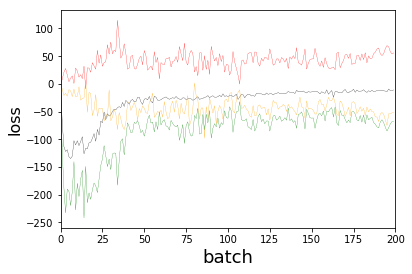

In [42]:

fig = plt.figure()
plt.plot([x[0] for x in gan.d_losses], color='black', linewidth=0.25)

plt.plot([x[1] for x in gan.d_losses], color='green', linewidth=0.25)
plt.plot([x[2] for x in gan.d_losses], color='red', linewidth=0.25)
plt.plot(gan.g_losses, color='orange', linewidth=0.25)

plt.xlabel('batch', fontsize=18)
plt.ylabel('loss', fontsize=16)

plt.xlim(0, 200)
# plt.ylim(0, 2)

plt.show()

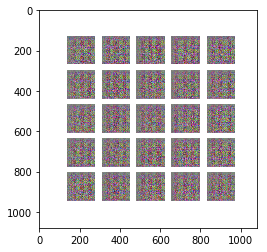

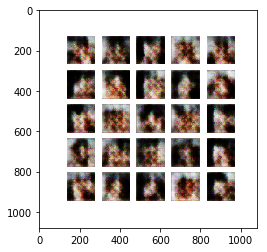

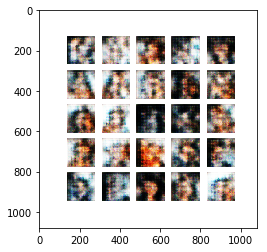

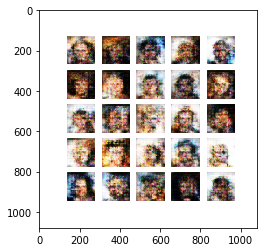

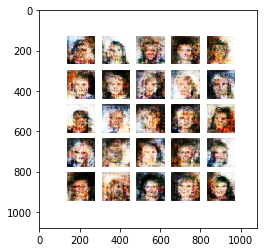

In [44]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def process(filename: str=None) -> None:
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)

process('/content/GDL_code/run/gan/0003_celeb/images/sample_0.png')
process('/content/GDL_code/run/gan/0003_celeb/images/sample_50.png')
process('/content/GDL_code/run/gan/0003_celeb/images/sample_100.png')
process('/content/GDL_code/run/gan/0003_celeb/images/sample_150.png')
process('/content/GDL_code/run/gan/0003_celeb/images/sample_190.png')
